In [ ]:
# 2(a)
import numpy as np

# set parameters
S0 = 40
K = 35
T = 1
r = 0.02
sigma = 0.4
m = 100
n = 10000
t = np.linspace(0, T, m+1)[1:]

# simulation process
Z = np.random.normal(0, 1, (n, m))
S = S0 * np.exp((r - 0.5 * sigma ** 2) * t + sigma * np.sqrt(t) * Z)
average_S = np.mean(S, axis=1)
payoffs = np.maximum(average_S - K, 0)
option_price = np.exp(-r * T) * np.mean(payoffs)
std_error = np.exp(-r * T) * np.std(payoffs) / np.sqrt(n)
confidence_interval = (option_price - 1.96 * std_error, option_price + 1.96 * std_error)

print("Estimated option price =", option_price)
print("95% confidence interval =", confidence_interval)


Estimated option price = 5.3041744770472725
95% confidence interval = (5.281577192786696, 5.326771761307849)


In [ ]:
# 2(b)
d = 8
percentiles = np.linspace(0, 100, d+1)
strata_bounds = np.percentile(S[:,-1], percentiles)

# simulation process
stratified_payoffs = []
samples_per_stratum = n // d
for i in range(d):
    lower_bound = strata_bounds[i]
    upper_bound = strata_bounds[i+1]
    for _ in range(samples_per_stratum):
        Z_strat = np.random.normal(0, 1, m)
        S_strat = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z_strat)
        if lower_bound <= S_strat[-1] <= upper_bound:
            average_S_strat = np.mean(S_strat)
            payoff_strat = np.maximum(average_S_strat - K, 0)
            stratified_payoffs.append(payoff_strat)

option_price_strat = np.exp(-r * T) * np.mean(stratified_payoffs)
std_error_strat = np.exp(-r * T) * np.std(stratified_payoffs) / np.sqrt(len(stratified_payoffs))
confidence_interval_strat = (option_price_strat - 1.96 * std_error_strat, option_price_strat + 1.96 * std_error_strat)

print("Stratified option price =", option_price_strat)
print("95% confidence interval =", confidence_interval_strat)

Stratified option price = 5.724892874485117
95% confidence interval = (5.636676016026853, 5.8131097329433805)


In [ ]:
t = np.linspace(0, T, m)
t_bar = np.mean(t)
sigma_bar_squared = sigma**2 * np.sum([(2 * (m - i) + 1) * t[i] for i in range(m)]) / (m**2 * t_bar)

# generate paths
Z = np.random.normal(0, 1, (n, m))
S = S0 * np.exp((r - 0.5 * sigma_bar_squared) * t + np.sqrt(sigma_bar_squared) * np.sqrt(t) * Z)
geom_mean = np.exp(np.mean(np.log(S), axis=1))

# post-stratification on geometric mean
d = 8
strata_bounds = np.percentile(geom_mean, np.linspace(0, 100, d+1))
stratified_payoffs = []

for i in range(d):
    lower_bound = strata_bounds[i]
    upper_bound = strata_bounds[i+1]
    in_stratum = (geom_mean >= lower_bound) & (geom_mean < upper_bound)
    stratified_sample = np.maximum(np.mean(S[in_stratum, :], axis=1) - K, 0)
    stratified_payoffs.extend(np.exp(-r * T) * stratified_sample)

# calculate option price
option_price = np.mean(stratified_payoffs)
std_error_strat = np.exp(-r * T) * np.std(stratified_payoffs) / np.sqrt(len(stratified_payoffs))
confidence_interval = (option_price - 1.96 * std_error_strat, option_price + 1.96 * std_error_strat)


# Output results
print("Stratified option price =", option_price)
print("95% confidence interval =", confidence_interval)

Stratified option price = 5.306580867354661
95% confidence interval = (5.288315554776674, 5.324846179932648)


Threshold z=1: Probability Estimate = 0.1576, 95% CI = (0.1553, 0.1598)
Threshold z=2: Probability Estimate = 0.0230, 95% CI = (0.0221, 0.0239)
Threshold z=3: Probability Estimate = 0.0014, 95% CI = (0.0012, 0.0016)
Threshold z=4: Probability Estimate = 0.0000, 95% CI = (-0.0000, 0.0000)
Threshold z=5: Probability Estimate = 0.0000, 95% CI = (0.0000, 0.0000)
Threshold z=6: Probability Estimate = 0.0000, 95% CI = (0.0000, 0.0000)


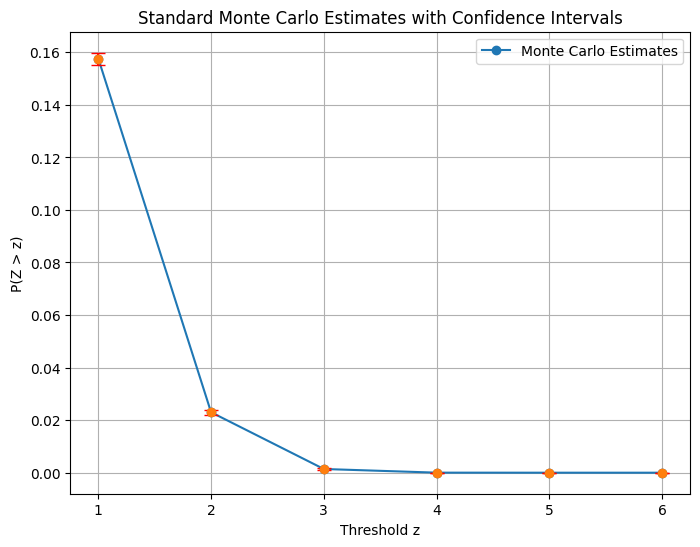

In [ ]:
# 3(a)
import matplotlib.pyplot as plt

# set parameters
n_simulations = 100000
thresholds = [1, 2, 3, 4, 5, 6]

np.random.seed(0)
Z = np.random.normal(0, 1, n_simulations)

# calculate probabilities for each threshold
tail_probabilities = []
confidence_intervals = []

for z in thresholds:
    p_hat = np.mean(Z > z)
    std_error = np.sqrt(p_hat * (1 - p_hat) / n_simulations)
    ci_lower = p_hat - 1.96 * std_error
    ci_upper = p_hat + 1.96 * std_error

    tail_probabilities.append(p_hat)
    confidence_intervals.append((ci_lower, ci_upper))

    print(f"Threshold z={z}: Probability Estimate = {p_hat:.4f}, 95% CI = ({ci_lower:.4f}, {ci_upper:.4f})")

# calculate error bars
ci_lower_errors = [p - ci[0] for p, ci in zip(tail_probabilities, confidence_intervals)]
ci_upper_errors = [ci[1] - p for p, ci in zip(tail_probabilities, confidence_intervals)]
error_bars = np.array([ci_lower_errors, ci_upper_errors])  # Shape should be (2, n)

# plot
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tail_probabilities, marker='o', label='Monte Carlo Estimates')
plt.errorbar(thresholds, tail_probabilities, yerr=error_bars, fmt='o', ecolor='red', capsize=5)
plt.xlabel('Threshold z')
plt.ylabel('P(Z > z)')
plt.title('Standard Monte Carlo Estimates with Confidence Intervals')
plt.grid(True)
plt.legend()
plt.show()

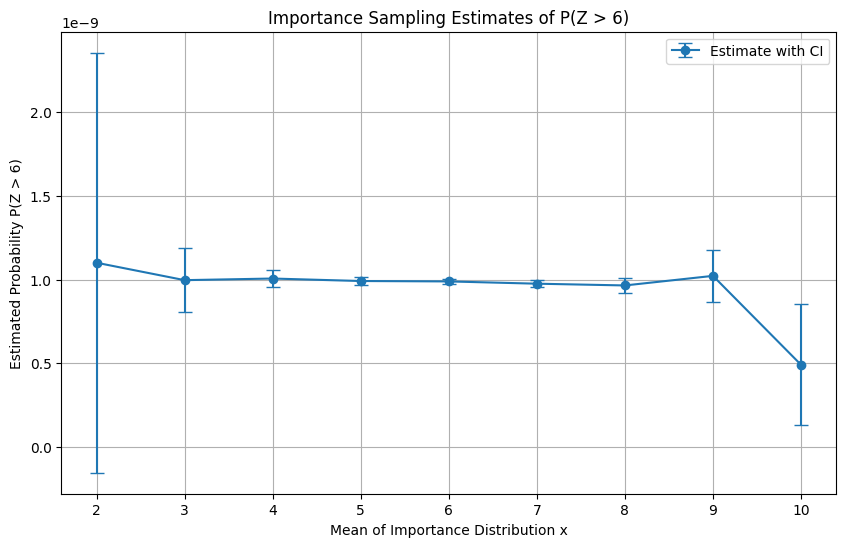

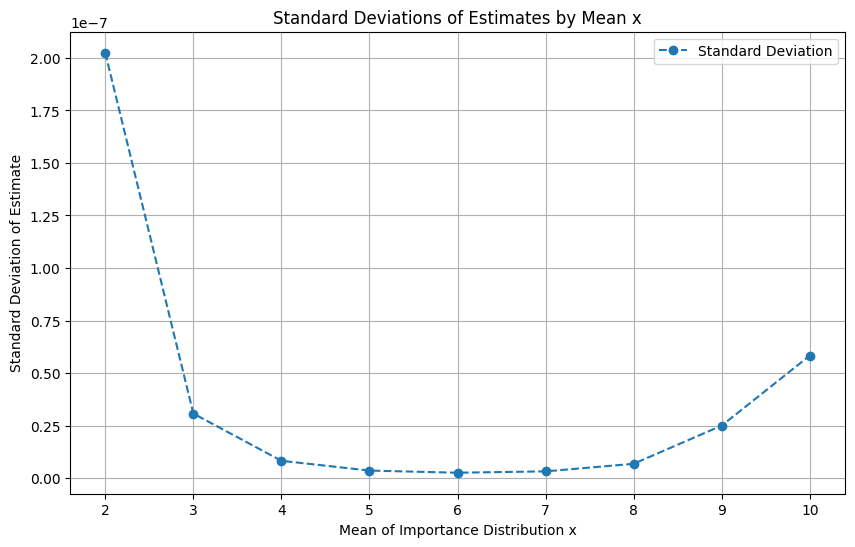

x = 3 gives the largest variance reduction


In [ ]:
# 3(b)
# set parameters
z_target = 6
x_values = np.arange(2, 11)

estimates = []
standard_deviations = []
lower_bounds = []
upper_bounds = []

# importance sampling
for x in x_values:
    Z_tilde = np.random.normal(x, 1, n_simulations)
    weights = np.exp(-0.5 * (Z_tilde ** 2 - (Z_tilde - x) ** 2))
    indicators = (Z_tilde > z_target).astype(int)

    # weighted estimates
    weighted_estimates = weights * indicators
    estimate = np.mean(weighted_estimates)
    variance = np.var(weighted_estimates)
    standard_deviation = np.sqrt(variance)
    sem = standard_deviation / np.sqrt(n_simulations)

    # confidence interval
    ci_lower = estimate - 1.96 * sem
    ci_upper = estimate + 1.96 * sem

    estimates.append(estimate)
    standard_deviations.append(standard_deviation)
    lower_bounds.append(estimate - ci_lower)
    upper_bounds.append(ci_upper - estimate)

# assemble error bars for matplotlib
errors = [lower_bounds, upper_bounds]  # Format for asymmetric error bars

# plot point estimates with confidence intervals
plt.figure(figsize=(10, 6))
plt.errorbar(x_values, estimates, yerr=errors, fmt='o-', capsize=5, label='Estimate with CI')
plt.title('Importance Sampling Estimates of P(Z > 6)')
plt.xlabel('Mean of Importance Distribution x')
plt.ylabel('Estimated Probability P(Z > 6)')
plt.grid(True)
plt.legend()
plt.show()

# plot standard deviations
plt.figure(figsize=(10, 6))
plt.plot(x_values, standard_deviations, 'o--', label='Standard Deviation')
plt.title('Standard Deviations of Estimates by Mean x')
plt.xlabel('Mean of Importance Distribution x')
plt.ylabel('Standard Deviation of Estimate')
plt.grid(True)
plt.legend()
plt.show()

print("x = 3 gives the largest variance reduction")